In [3]:
import matplotlib.pyplot as plt

plt.annotate('[ProPublica https://www.propublica.org/datastore/dataset/amazon-pricing-algorithm-data-set]', (0,0),
             (-80,-20), fontsize=6, xycoords='axes fraction', textcoords='offset points', va='top')

Text(-80,-20,'[ProPublica https://www.propublica.org/datastore/dataset/amazon-pricing-algorithm-data-set]')

<a id="Legend"></a>
### Legend

- 250 bestselling products over several weeks
- For items that were listed without a shipping price, they were added to the shopping cart and proceeded to checkout where the shipping price was displayed 
- All of the items that lacked a shipping price were sold by Amazon or sellers in the “Fulfilled by Amazon” program
- Once shipping prices were compiled for all vendors, the price was re-calculated to combine price plus shipping for each item and re-ranked the items as they would have been ranked if shipping was included for all items
- For all products, sales tax was excluded from the analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
url = '/Users/ginaadduci/Desktop/git-repo-practice/final_project_amazon-ranking-analysis/data/09-19-Amazon-Ranking-Analysis.csv'

In [5]:
amazon = pd.read_csv(url, parse_dates = True, index_col='ScrapeDate')

In [6]:
amazon.head(10)

,Index,ProductName,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType,BBScrapedPrice,BBVendorType,BBVendor,BBCorrectedPrice
ScrapeDate,,,,,,,,,,,,,
2016-06-14,0,#1 BEST Probiotic Supplement - 60 Day Supply w...,2,2,1,20.99,20.99,Supplement Warriors,Other,-1.0,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
2016-06-14,1,#1 BEST Probiotic Supplement - 60 Day Supply w...,1,1,2,19.99,25.02,Sharp Nutrition,FBA,-1.0,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
2016-06-27,2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",1,1,1,3.96,3.96,speedy tests,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
2016-06-27,3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2,1,1,3.96,3.96,Drug Abuse Control,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
2016-06-27,4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",3,1,1,3.96,3.96,Lowest Priced Tests,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
2016-06-27,5,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",11,9,1,3.96,3.96,speedy tests,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
2016-06-27,6,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",5,3,2,6.50,6.50,"Uritox, LLC",Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
2016-06-27,7,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",6,4,3,7.99,7.99,mynewwhip,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
2016-06-27,8,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",7,5,4,8.49,8.49,ChopShopDeals,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97


In [7]:
amazon.tail(10)

,Index,ProductName,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType,BBScrapedPrice,BBVendorType,BBVendor,BBCorrectedPrice
ScrapeDate,,,,,,,,,,,,,
2016-08-30,6963,myBaby SoundSpa Portable,6,6,5,28.36,28.36,Happy Haus,Other,19.99,Amazon,Ships from and sold by Amazon.com.,26.77
2016-08-30,6964,myBaby SoundSpa Portable,7,7,6,31.11,31.11,MINDeyes,Other,19.99,Amazon,Ships from and sold by Amazon.com.,26.77
2016-08-30,6965,myBaby SoundSpa Portable,5,5,7,25.20,31.98,Serenity Health & Home Decor,FBA,19.99,Amazon,Ships from and sold by Amazon.com.,26.77
2016-08-30,6966,myBaby SoundSpa Portable,9,9,8,32.89,32.89,Aurora Store19,Other,19.99,Amazon,Ships from and sold by Amazon.com.,26.77
2016-08-30,6967,myBaby SoundSpa Portable,10,10,9,33.72,33.72,Tropicaltyphoonllc,Other,19.99,Amazon,Ships from and sold by Amazon.com.,26.77
2016-08-30,6968,myBaby SoundSpa Portable,11,11,10,34.14,34.14,AMAZIN',Other,19.99,Amazon,Ships from and sold by Amazon.com.,26.77
2016-08-30,6969,myBaby SoundSpa Portable,12,12,11,34.98,34.98,Happy Titan,Other,19.99,Amazon,Ships from and sold by Amazon.com.,26.77
2016-08-30,6970,myBaby SoundSpa Portable,13,13,12,35.00,35.00,DDN INC,Other,19.99,Amazon,Ships from and sold by Amazon.com.,26.77
2016-08-30,6971,myBaby SoundSpa Portable,8,8,13,31.95,38.73,Marilyn's Galleria,FBA,19.99,Amazon,Ships from and sold by Amazon.com.,26.77


Number of rows and columns

In [8]:
amazon.shape

(6973, 13)

6,973 vendor listings in total 

Types of data in columns

In [9]:
amazon.dtypes

Index                       int64
ProductName                object
ScrapedIndex                int64
ScrapedIndexTrueRank        int64
CorrectedIndexTrueRank      int64
ScrapedIndexPrice         float64
CorrectedPrice            float64
ScrapedIndexVendor         object
ScrapedIndexVendorType     object
BBScrapedPrice            float64
BBVendorType               object
BBVendor                   object
BBCorrectedPrice          float64
dtype: object

Column labels

In [10]:
amazon.columns

Index(['Index', 'ProductName', 'ScrapedIndex', 'ScrapedIndexTrueRank',
       'CorrectedIndexTrueRank', 'ScrapedIndexPrice', 'CorrectedPrice',
       'ScrapedIndexVendor', 'ScrapedIndexVendorType', 'BBScrapedPrice',
       'BBVendorType', 'BBVendor', 'BBCorrectedPrice'],
      dtype='object')

In [11]:
amazon.drop(['ScrapedIndex'], axis=1, inplace=True)

In [12]:
amazon.rename(columns={'ProductName':'product', 'ScrapedIndexTrueRank':'initial_rank',
                       'CorrectedIndexTrueRank': 'true_rank', 'ScrapedIndexPrice' : 'initial_price',
                       'CorrectedPrice':'true_price', 'ScrapedIndexVendor':'vendor',
                       'ScrapedIndexVendorType': 'initial_vendor_type', 'BBScrapedPrice':'buybox_initial_price',
                       'BBVendorType':'buybox_vendor_type', 'BBVendor':'buybox_vendor', 'BBCorrectedPrice' : 
                       'buybox_true_price'}, inplace =True)

In [13]:
amazon.columns

Index(['Index', 'product', 'initial_rank', 'true_rank', 'initial_price',
       'true_price', 'vendor', 'initial_vendor_type', 'buybox_initial_price',
       'buybox_vendor_type', 'buybox_vendor', 'buybox_true_price'],
      dtype='object')

Checking for missing data

In [14]:
amazon.isnull().sum()

Index                     0
product                   0
initial_rank              0
true_rank                 0
initial_price             0
true_price                0
vendor                    0
initial_vendor_type       0
buybox_initial_price      0
buybox_vendor_type        0
buybox_vendor           164
buybox_true_price         0
dtype: int64

Dropped missing vendors

In [15]:
amazon.dropna(inplace = True)

In [16]:
amazon.isnull().sum()

Index                   0
product                 0
initial_rank            0
true_rank               0
initial_price           0
true_price              0
vendor                  0
initial_vendor_type     0
buybox_initial_price    0
buybox_vendor_type      0
buybox_vendor           0
buybox_true_price       0
dtype: int64

In [296]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6809 entries, 2016-06-14 to 2016-08-30
Data columns (total 9 columns):
Index                   6809 non-null int64
initial_rank            6809 non-null int64
true_rank               6809 non-null int64
initial_price           6809 non-null float64
true_price              6809 non-null float64
buybox_initial_price    6809 non-null float64
buybox_true_price       6809 non-null float64
bb_vtype                6809 non-null int64
bb_type_initial         6809 non-null int64
dtypes: float64(4), int64(5)
memory usage: 692.0 KB


<a id='True Rank Versus Initial Rank'></a>
### True Rank Versus Initial Rank

- Once shipping prices were compiled for all vendors, the price was re-calculated to combine price plus shipping for each item and re-ranked the items as they would have been ranked if shipping was included for all items

**Hypothesis**: Amazon products were ranked higher for the Initial Rank

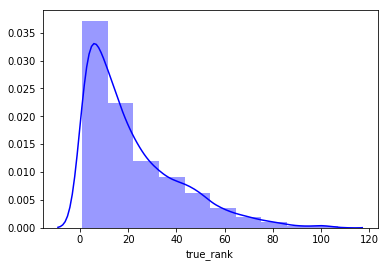

In [17]:
true_rank = amazon.loc[:, 'true_rank']
sns.distplot(true_rank, bins=10, color='b');

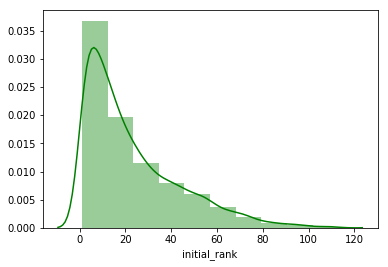

In [18]:
initial_rank = amazon.loc[:, 'initial_rank']
sns.distplot(initial_rank, bins=10, color='g');

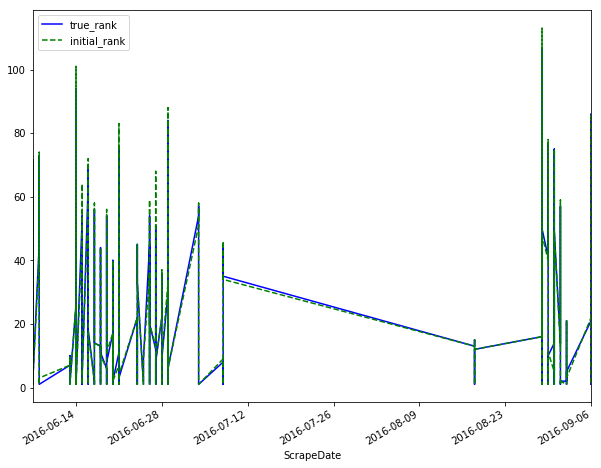

In [19]:
amazon.loc[:, ('true_rank', 'initial_rank')].plot(figsize=(10,8), 
                                                  style={'true_rank': 'b', 'initial_rank': '--g'});

In [20]:
amazon.buybox_vendor_type.unique()

array(['FBA', 'O', 'Amazon'], dtype=object)

In [21]:
buybox_vendor_type_o_replace = {'Amazon':'amazon','O':'other','FBA':'fba'}
amazon['buybox_vendor_type'].replace(buybox_vendor_type_o_replace, inplace = True)

/Users/ginaadduci/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


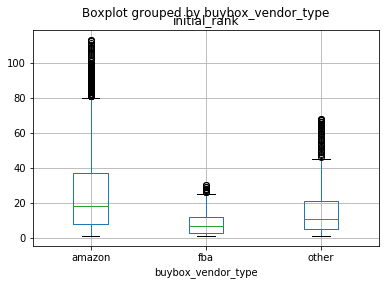

In [22]:
amazon.boxplot('initial_rank', 'buybox_vendor_type');

/Users/ginaadduci/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


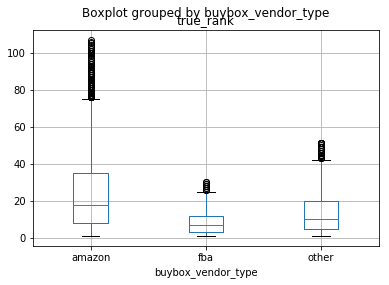

In [23]:
amazon.boxplot('true_rank', 'buybox_vendor_type');

In [24]:
amazon.true_rank.mean()

21.727125862828608

In [25]:
amazon.initial_rank.mean()

22.91202819797327

In [26]:
amazon.loc[:, 'buybox_vendor_type'].value_counts()

amazon    5788
other      551
fba        470
Name: buybox_vendor_type, dtype: int64

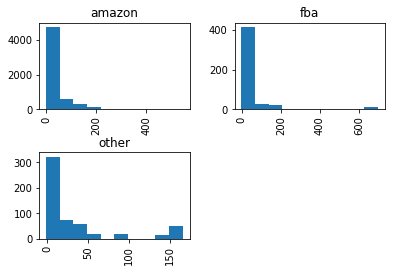

In [27]:
amazon.hist('buybox_initial_price', 'buybox_vendor_type'); 

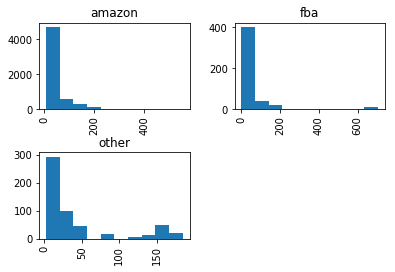

In [28]:
amazon.hist('buybox_true_price', 'buybox_vendor_type');

**Analysis Results**: Analysis proves that Amazon consistently places their products in the "Buy Box" section during the customer's user journey, even when 'Other' had cheaper products

<a id='True Price Initial Price'></a>
### True Price Versus Initial Price

- Once shipping prices were compiled for all vendors, the price was re-calculated to combine price plus shipping for each item and re-ranked the items as they would have been ranked if shipping was included for all items

**Hypothesis**: Amazon and FBA products were placed higher in ranking order, but were more expensive

In [29]:
amazon.buybox_initial_price.mean()

37.194115141723124

In [30]:
amazon.buybox_true_price.mean()

45.87530621236549

In [31]:
amazon.groupby('buybox_vendor_type').mean()

,Index,initial_rank,true_rank,initial_price,true_price,buybox_initial_price,buybox_true_price
buybox_vendor_type,,,,,,,
amazon,3411.141500,24.728058,23.488079,55.407719,56.010788,37.481282,46.031356
fba,4313.157447,8.763830,8.685106,53.358319,54.893447,36.571553,46.602383
other,3575.094374,15.903811,14.353902,56.455771,57.006770,34.708603,43.615880


<a id='Understanding the Data'></a>
### Understanding the Data 

**Additional Data Pulls**

In [32]:
amazon.loc[:, 'product'].value_counts()

Fujifilm INSTAX Mini Instant Film (Rainbow)                                                                                                                                                        154
Suncast GHW1732 Resin Wicker Trash Hideaway                                                                                                                                                        115
Fiskars 45mm Contour Rotary Cutter (195210-1001)                                                                                                                                                   106
K&N 99-5000 Aerosol Recharger Filter Care Service Kit                                                                                                                                               95
Honeywell HT-908 Turbo Force Room Air Circulator Fan                                                                                                                                                90
Sassy

In [33]:
amazon.buybox_vendor.unique()

array(['Sold by Sharp Nutrition and Fulfilled by Amazon.',
       'Sold by Michael Minyety and Fulfilled by Amazon.',
       'Ships from and sold by Happy DRH.',
       'Ships from and sold by Solutions Pest & Lawn.',
       'Ships from and sold by Amazon.com.',
       'Ships from and sold by Adams Brown Company.',
       'Ships from and sold by Amazon.com in easy-to-open packaging.',
       'Ships from and sold by Cell Emporium.',
       'Sold by Art Naturals and Fulfilled by Amazon.',
       'Sold by LuckyLuckyLucky and Fulfilled by Amazon.',
       'Sold by Radha Beauty Products and Fulfilled by Amazon.',
       'Ships from and sold by PORTABLE GUY.',
       'Ships from and sold by Focus Camera.',
       'Ships from and sold by Brookstone.',
       'Sold by Finelane, USA and Fulfilled by Amazon.',
       'Sold by dizzy deals and Fulfilled by Amazon.',
       'Sold by Cabinet Hardware 4 Less and Fulfilled by Amazon.',
       'Sold by TabletExpress and Fulfilled by Amazon.',
       'S

In [34]:
Vendor_Shipment_Uniques = pd.value_counts(amazon['buybox_vendor'].values)
Vendor_Shipment_Uniques

Ships from and sold by Amazon.com.                                      5293
Ships from and sold by Amazon.com in easy-to-open packaging.             495
Ships from and sold by El Garaje.                                         86
Ships from and sold by PORTABLE GUY.                                      46
Ships from and sold by ShopChanute.                                       44
Ships from and sold by HE TAO.                                            39
Sold by Beauty Base and Fulfilled by Amazon.                              39
Sold by CHENGFENGPOLANG and Fulfilled by Amazon.                          32
Sold by XoomBot and Fulfilled by Amazon.                                  32
Ships from and sold by Gatzies.                                           28
Ships from and sold by samselectro in easy-to-open packaging.             26
Ships from and sold by Imagine Toys!.                                     26
Sold by Deals On Call and Fulfilled by Amazon.                            26

In [35]:
amazon.vendor.value_counts()

Amazon.com                                                           192
UnbeatableSale, Inc                                                   46
Gatzies                                                               38
DDN INC                                                               37
DropAir                                                               34
MINDeyes                                                              34
V1-Store                                                              33
Toys US                                                               33
ShopChanute                                                           32
MeagaDeal                                                             30
XoXoGroupLLC                                                          29
TheNewMall                                                            28
Mild Shop                                                             27
Happy Titan                                        

In [36]:
amazon.columns

Index(['Index', 'product', 'initial_rank', 'true_rank', 'initial_price',
       'true_price', 'vendor', 'initial_vendor_type', 'buybox_initial_price',
       'buybox_vendor_type', 'buybox_vendor', 'buybox_true_price'],
      dtype='object')

In [37]:
Demo = ['buybox_vendor_type', 'initial_rank', 'true_rank']

amazon_demo = amazon.sort_values('buybox_vendor_type', ascending = True)
amazon_demo.groupby('buybox_vendor_type').head(10)[Demo]

,buybox_vendor_type,initial_rank,true_rank
ScrapeDate,,,
2016-06-29,amazon,9,8
2016-09-02,amazon,7,4
2016-09-02,amazon,6,3
2016-09-02,amazon,5,2
2016-09-02,amazon,4,1
2016-09-01,amazon,57,57
2016-09-01,amazon,56,56
2016-09-01,amazon,59,55
2016-09-01,amazon,55,54


In [38]:
Demo = ['buybox_vendor_type', 'initial_rank', 'true_rank']

amazon_demo = amazon.sort_values('true_rank', ascending = True)
amazon_demo.groupby('true_rank').head(10)[Demo]

,buybox_vendor_type,initial_rank,true_rank
ScrapeDate,,,
2016-06-14,fba,2,1
2016-08-30,amazon,2,1
2016-07-08,fba,2,1
2016-06-26,fba,1,1
2016-06-29,amazon,1,1
2016-06-21,amazon,1,1
2016-06-27,amazon,1,1
2016-06-29,amazon,1,1
2016-06-14,fba,1,1


<a id="Data Analysis"></a>
### Data Analysis

In [39]:
amazon.columns

Index(['Index', 'product', 'initial_rank', 'true_rank', 'initial_price',
       'true_price', 'vendor', 'initial_vendor_type', 'buybox_initial_price',
       'buybox_vendor_type', 'buybox_vendor', 'buybox_true_price'],
      dtype='object')

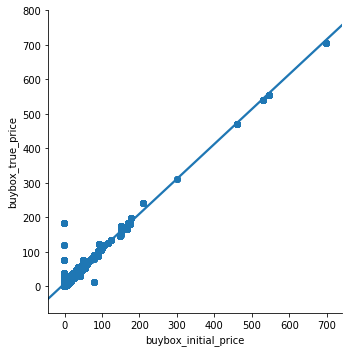

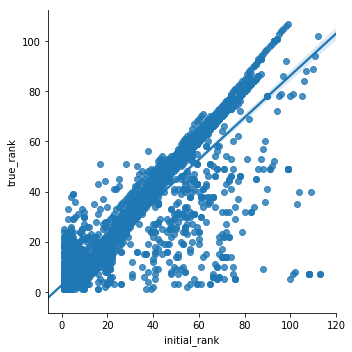

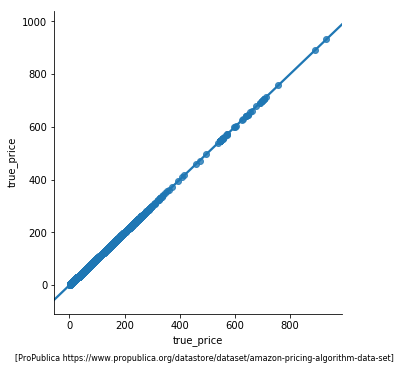

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

sns.lmplot(x='buybox_initial_price', y='buybox_true_price', data=amazon)
plt.show()
sns.lmplot(x='initial_rank', y='true_rank', data=amazon)
plt.show()
sns.lmplot(x='true_price', y='true_price', data=amazon);

plt.annotate('[ProPublica https://www.propublica.org/datastore/dataset/amazon-pricing-algorithm-data-set]', 
             (-0.1,-0.1),
(-10,-10), fontsize=8, xycoords='axes fraction', textcoords='offset points', va='top');

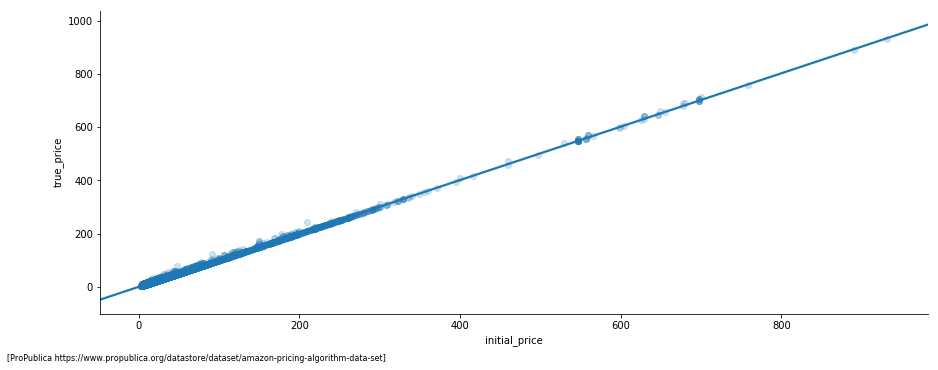

In [41]:
sns.lmplot(x = 'initial_price', 
           y = 'true_price', 
           data = amazon,
           aspect = 2.5,
           scatter_kws = {'alpha' : 0.2}
          );
plt.annotate('[ProPublica https://www.propublica.org/datastore/dataset/amazon-pricing-algorithm-data-set]', 
             (-0.1,-0.1), (-10,-10), fontsize=8, xycoords='axes fraction', textcoords='offset points', va='top');

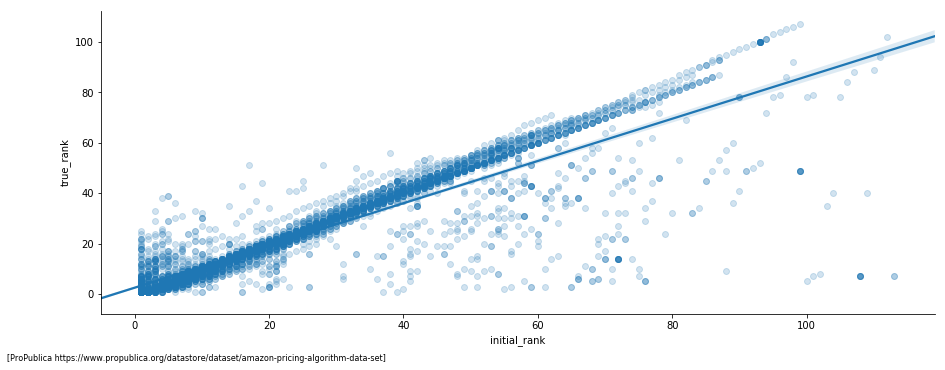

In [42]:
sns.lmplot(x = 'initial_rank', 
           y = 'true_rank', 
           data = amazon,
           aspect = 2.5,
           scatter_kws = {'alpha' : 0.2}
          );

plt.annotate('[ProPublica https://www.propublica.org/datastore/dataset/amazon-pricing-algorithm-data-set]', 
             (-0.1,-0.1), (-10,-10), fontsize=8, xycoords='axes fraction', textcoords='offset points', va='top');

In [43]:
amazon.loc[:, ['initial_rank', 'true_rank']].describe()

,initial_rank,true_rank
count,6809.000000,6809.000000
mean,22.912028,21.727126
std,20.654729,19.283459
min,1.000000,1.000000
25%,7.000000,7.000000
50%,16.000000,16.000000
75%,33.000000,32.000000
max,113.000000,107.000000


In [44]:
amazon.loc[:, ['initial_rank', 'true_rank']].describe()

,initial_rank,true_rank
count,6809.000000,6809.000000
mean,22.912028,21.727126
std,20.654729,19.283459
min,1.000000,1.000000
25%,7.000000,7.000000
50%,16.000000,16.000000
75%,33.000000,32.000000
max,113.000000,107.000000


In [45]:
amazon.loc[:, ['buybox_true_price', 'buybox_initial_price']].describe()

,buybox_true_price,buybox_initial_price
count,6809.000000,6809.000000
mean,45.875306,37.194115
std,64.219256,62.303672
min,0.000000,-1.000000
25%,15.780000,9.760000
50%,23.980000,15.990000
75%,47.920000,37.040000
max,706.110000,698.000000


In [46]:
amazon.loc[:, ['buybox_true_price', 'true_price']].describe()

,buybox_true_price,true_price
count,6809.000000,6809.000000
mean,45.875306,56.014259
std,64.219256,75.227399
min,0.000000,2.380000
25%,15.780000,19.990000
50%,23.980000,32.130000
75%,47.920000,56.330000
max,706.110000,931.800000


In [47]:
# Correlation calculation 
amazon.loc[:,['initial_rank','true_rank', 'initial_price', 'true_price',
                    'buybox_vendor_type', 'buybox_initial_price', 'buybox_true_price']].corr()

,initial_rank,true_rank,initial_price,true_price,buybox_initial_price,buybox_true_price
initial_rank,1.000000,0.897077,0.032231,0.024696,-0.054699,-0.058678
true_rank,0.897077,1.000000,0.045485,0.040448,-0.052992,-0.056991
initial_price,0.032231,0.045485,1.000000,0.999518,0.950974,0.973103
true_price,0.024696,0.040448,0.999518,1.000000,0.952252,0.974275
buybox_initial_price,-0.054699,-0.052992,0.950974,0.952252,1.000000,0.980706
buybox_true_price,-0.058678,-0.056991,0.973103,0.974275,0.980706,1.000000


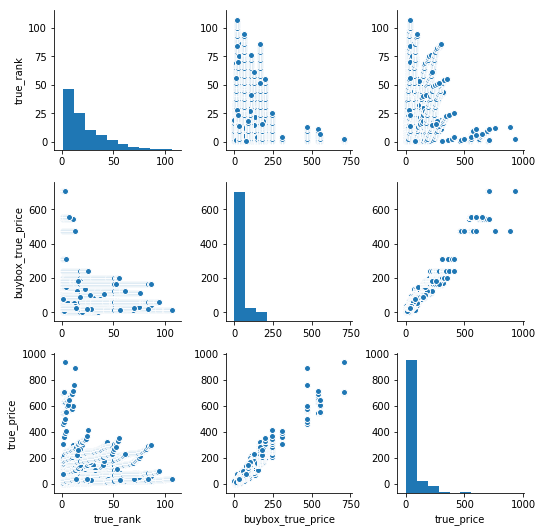

In [48]:
sns.pairplot(amazon, vars=['true_rank', 'buybox_true_price', 'true_price']);

Appears to be a correlation between True Price & True Rank

In [49]:
amazon.loc[:, 'product'].value_counts()

Fujifilm INSTAX Mini Instant Film (Rainbow)                                                                                                                                                        154
Suncast GHW1732 Resin Wicker Trash Hideaway                                                                                                                                                        115
Fiskars 45mm Contour Rotary Cutter (195210-1001)                                                                                                                                                   106
K&N 99-5000 Aerosol Recharger Filter Care Service Kit                                                                                                                                               95
Honeywell HT-908 Turbo Force Room Air Circulator Fan                                                                                                                                                90
Sassy

In [50]:
amazon.loc[:, 'buybox_vendor'].value_counts()

Ships from and sold by Amazon.com.                                      5293
Ships from and sold by Amazon.com in easy-to-open packaging.             495
Ships from and sold by El Garaje.                                         86
Ships from and sold by PORTABLE GUY.                                      46
Ships from and sold by ShopChanute.                                       44
Ships from and sold by HE TAO.                                            39
Sold by Beauty Base and Fulfilled by Amazon.                              39
Sold by CHENGFENGPOLANG and Fulfilled by Amazon.                          32
Sold by XoomBot and Fulfilled by Amazon.                                  32
Ships from and sold by Gatzies.                                           28
Ships from and sold by samselectro in easy-to-open packaging.             26
Ships from and sold by Imagine Toys!.                                     26
Sold by Deals On Call and Fulfilled by Amazon.                            26

<a id="Splitting Data into 2"></a>
### Splitting Data into 2

In [254]:
amazon.columns

Index(['Index', 'initial_rank', 'true_rank', 'initial_price', 'true_price',
       'buybox_initial_price', 'buybox_true_price', 'bb_vtype',
       'bb_type_initial'],
      dtype='object')

In [282]:
amazon.loc[:, 'buybox_initial_price'].value_counts().tail()

77.30    2
92.99    2
6.30     2
71.00    2
69.99    2
Name: buybox_initial_price, dtype: int64

In [283]:
amazon_demo = amazon.sort_values('buybox_initial_price', ascending = True)
amazon_demo

,Index,initial_rank,true_rank,initial_price,true_price,buybox_initial_price,buybox_true_price,bb_vtype,bb_type_initial
ScrapeDate,,,,,,,,,
2016-06-14,0,2,1,20.99,20.99,0.00,25.02,2,0
2016-09-06,5779,13,13,29.98,29.98,0.00,24.64,1,0
2016-09-06,5780,14,14,29.99,29.99,0.00,24.64,1,0
2016-09-06,5781,14,14,29.99,29.99,0.00,24.64,1,0
2016-09-06,5782,15,15,30.80,30.80,0.00,24.64,1,0
2016-09-06,5783,16,16,30.99,30.99,0.00,24.64,1,0
2016-09-06,5784,17,17,31.00,31.00,0.00,24.64,1,0
2016-09-06,5785,18,18,32.22,32.22,0.00,24.64,1,0
2016-09-06,5786,19,19,32.30,32.30,0.00,24.64,1,0


In [284]:
# Read in and prepare the vehicle testing data.
url = '/Users/ginaadduci/Desktop/git-repo-practice/final_project_amazon-ranking-analysis/data/09-19-Amazon-Ranking-Analysis.csv'
test1 = pd.read_csv(url)

In [285]:
test1.columns

Index(['Index', 'ProductName', 'ScrapeDate', 'ScrapedIndex',
       'ScrapedIndexTrueRank', 'CorrectedIndexTrueRank', 'ScrapedIndexPrice',
       'CorrectedPrice', 'ScrapedIndexVendor', 'ScrapedIndexVendorType',
       'BBScrapedPrice', 'BBVendorType', 'BBVendor', 'BBCorrectedPrice'],
      dtype='object')

In [286]:
test1.rename(columns={'ScrapedIndexTrueRank':'initial_rank',
                       'CorrectedIndexTrueRank': 'true_rank', 'ScrapedIndexPrice' : 'initial_price',
                       'CorrectedPrice':'true_price','BBScrapedPrice':'buybox_initial_price',
                        'BBCorrectedPrice' : 'buybox_true_price'}, inplace =True)

In [287]:
test1.isnull().sum()

Index                       0
ProductName                 0
ScrapeDate                  0
ScrapedIndex                0
initial_rank                0
true_rank                   0
initial_price               0
true_price                  0
ScrapedIndexVendor          0
ScrapedIndexVendorType      0
buybox_initial_price        0
BBVendorType                0
BBVendor                  164
buybox_true_price           0
dtype: int64

In [288]:
test.dropna(inplace = True)

In [289]:
test1.columns

Index(['Index', 'ProductName', 'ScrapeDate', 'ScrapedIndex', 'initial_rank',
       'true_rank', 'initial_price', 'true_price', 'ScrapedIndexVendor',
       'ScrapedIndexVendorType', 'buybox_initial_price', 'BBVendorType',
       'BBVendor', 'buybox_true_price'],
      dtype='object')

In [290]:
test1.drop(['ScrapedIndex', 'ProductName', 'ScrapedIndexVendor', 'BBVendor', 'ScrapeDate'], axis=1, inplace=True)

In [291]:
test1.rename(columns={'ScrapedIndexTrueRank':'initial_rank',
                       'CorrectedIndexTrueRank': 'true_rank', 'ScrapedIndexPrice' : 'initial_price',
                       'CorrectedPrice':'true_price','BBScrapedPrice':'buybox_initial_price',
                        'BBCorrectedPrice' : 'buybox_true_price'}, inplace =True)

In [292]:
test1.columns

Index(['Index', 'initial_rank', 'true_rank', 'initial_price', 'true_price',
       'ScrapedIndexVendorType', 'buybox_initial_price', 'BBVendorType',
       'buybox_true_price'],
      dtype='object')

In [293]:
#Price includes negative numbers. To ensure data is not skewed, I replaced negative with 0. 
test1.loc[:,'buybox_initial_price'].replace([-1],0, inplace=True)
test1.loc[:,'initial_price'].replace([-1],0, inplace=True)

In [294]:
test1.head()

,Index,initial_rank,true_rank,initial_price,true_price,ScrapedIndexVendorType,buybox_initial_price,BBVendorType,buybox_true_price
0,0,2,1,20.99,20.99,Other,0.0,FBA,25.02
1,1,1,2,19.99,25.02,FBA,0.0,FBA,25.02
2,2,1,1,3.96,3.96,Other,4.9,FBA,9.97
3,3,1,1,3.96,3.96,Other,4.9,FBA,9.97
4,4,1,1,3.96,3.96,Other,4.9,FBA,9.97


In [ ]:
# Transform "buybox_vendor_type" 
test1.loc[:, 'bb_vtype'] = test1.loc[:, 'BBVendorType'].map({'Amazon': 1, 'O': 3, 'FBA': 2})
test1.drop('BBVendorType', axis=1, inplace=True)
test1.loc[:, 'bb_type_initial'] = test1.loc[:, 'ScrapedIndexVendorType'].map({'Amazon': 1, 'O': 3, 'FBA': 2})
test1.drop('ScrapedIndexVendorType', axis=1, inplace=True)
test1

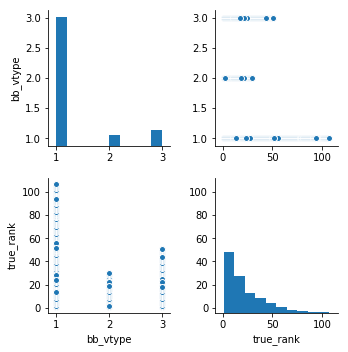

In [269]:
sns.pairplot(test1, vars=['bb_vtype', 'true_rank']);

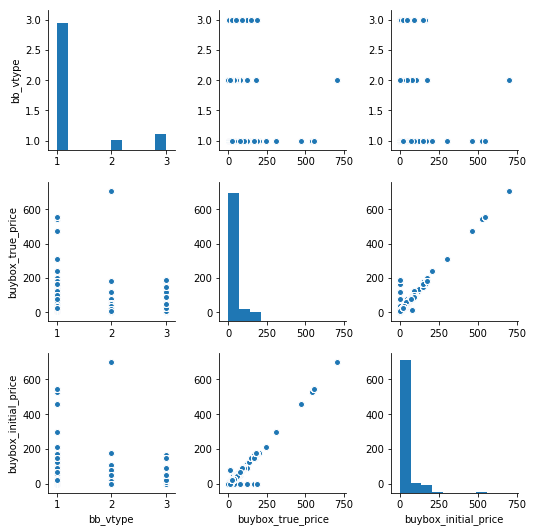

In [270]:
sns.pairplot(test1, vars=['bb_vtype', 'buybox_true_price', 'buybox_initial_price']);

In [271]:
test1.describe()

,Index,initial_rank,true_rank,initial_price,true_price,buybox_initial_price,buybox_true_price,bb_vtype,bb_type_initial
count,6973.000000,6973.000000,6973.000000,6973.000000,6973.000000,6973.000000,6973.000000,6973.000000,601.000000
mean,3486.000000,22.730962,21.559300,54.904896,55.567631,36.347158,45.827961,1.272480,1.680532
std,2013.076046,20.520442,19.154709,74.293356,74.476092,61.807480,63.889925,0.635113,0.466659
min,0.000000,1.000000,1.000000,2.380000,2.380000,0.000000,0.000000,1.000000,1.000000
25%,1743.000000,7.000000,7.000000,19.530000,20.010000,8.990000,15.790000,1.000000,1.000000
50%,3486.000000,16.000000,16.000000,31.900000,32.080000,14.940000,23.340000,1.000000,2.000000
75%,5229.000000,33.000000,31.000000,55.890000,56.100000,36.990000,47.920000,1.000000,2.000000
max,6972.000000,113.000000,107.000000,931.800000,931.800000,698.000000,706.110000,3.000000,2.000000


In [280]:
test1.isnull().sum()

Index                     0
initial_rank              0
true_rank                 0
initial_price             0
true_price                0
buybox_initial_price      0
buybox_true_price         0
bb_vtype                  0
bb_type_initial         750
universe                  0
dtype: int64

In [272]:
test1.loc[:, 'buybox_true_price'] > 100

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
6943    False
6944    False
6945    False
6946    False
6947    False
6948    False
6949    False
6950    False
6951    False
6952    False
6953    False
6954    False
6955    False
6956    False
6957    False
6958    False
6959    False
6960    False
6961    False
6962    False
6963    False
6964    False
6965    False
6966    False
6967    False
6968    False
6969    False
6970    False
6971    False
6972    False
Name: buybox_true_price, Length: 6973, dtype: bool

In [273]:
test1 = test1.loc[test1.loc[:, 'buybox_true_price'] > 100, :]
test1.shape

(830, 9)

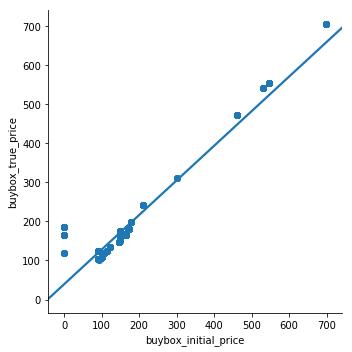

In [274]:
sns.lmplot(x='buybox_initial_price', y='buybox_true_price', data=test1, ci=None); #CI = Confidence Intervals

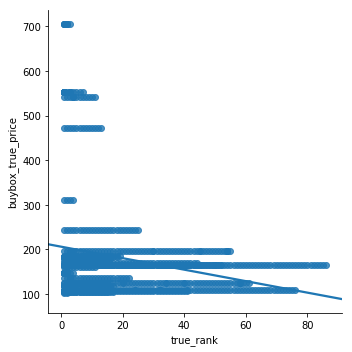

In [275]:
sns.lmplot(x='true_rank', y='buybox_true_price', data=test1, ci=None); #CI = Confidence Intervals

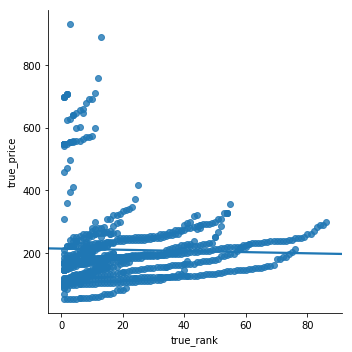

In [276]:
sns.lmplot(x='true_rank', y='true_price', data=test1, ci=None); #CI = Confidence Intervals

In [ ]:
#Low-Bias, High Variance

In [279]:
# Set a random seed for reproducibility.
np.random.seed(500)

# Randomly assign every observation to either universe 1 or universe 2.
test1.loc[:, 'universe'] = np.random.randint(1,3, len(test1))
test1.head()

/Users/ginaadduci/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Index,initial_rank,true_rank,initial_price,true_price,buybox_initial_price,buybox_true_price,bb_vtype,bb_type_initial,universe
189,189,2,1,107.73,107.73,99.99,109.97,1,NaN,1
190,190,3,2,109.80,109.80,99.99,109.97,1,NaN,2
191,191,1,3,99.99,109.97,99.99,109.97,1,1.0,2
192,192,4,4,109.99,109.99,99.99,109.97,1,NaN,2
193,193,5,5,111.53,111.53,99.99,109.97,1,NaN,1


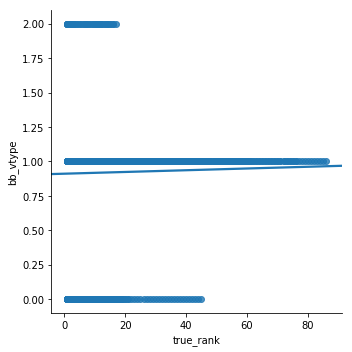

In [245]:
sns.lmplot(x='true_rank', y='bb_vtype', data=test1, ci=None);

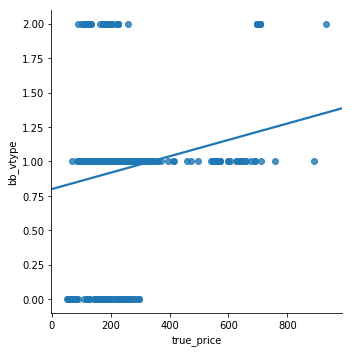

In [246]:
sns.lmplot(x='true_price', y='bb_vtype', data=test1, ci=None);

<a id="Ensembles"></a>
### Ensembles

In [85]:
amazon.columns

Index(['Index', 'product', 'initial_rank', 'true_rank', 'initial_price',
       'true_price', 'vendor', 'initial_vendor_type', 'buybox_initial_price',
       'buybox_vendor_type', 'buybox_vendor', 'buybox_true_price'],
      dtype='object')

In [86]:
amazon.dtypes

Index                     int64
product                  object
initial_rank              int64
true_rank                 int64
initial_price           float64
true_price              float64
vendor                   object
initial_vendor_type      object
buybox_initial_price    float64
buybox_vendor_type       object
buybox_vendor            object
buybox_true_price       float64
dtype: object

In [87]:
# Transform "buybox_vendor_type" 
buybox_vendor_type_o_replace = {'Amazon':'1','O':'0','FBA':'2'}
amazon['buybox_vendor_type'].replace(buybox_vendor_type_o_replace, inplace = True)

In [88]:
buybox_vtype_data = pd.value_counts(amazon['buybox_vendor_type'].values)
buybox_vtype_data

amazon    5788
other      551
fba        470
dtype: int64

In [89]:
# Transform "buybox_vendor_type" 
amazon.loc[:, 'bb_vtype'] = amazon.loc[:, 'buybox_vendor_type'].map({'amazon': 1, 'other': 0, 'fba': 2})
amazon.drop('buybox_vendor_type', axis=1, inplace=True)

In [90]:
bb_vtype_data = pd.value_counts(amazon['bb_vtype'].values)
bb_vtype_data

1    5788
0     551
2     470
dtype: int64

In [91]:
initial_vtype = pd.value_counts(amazon['initial_vendor_type'].values)
initial_vtype

Other     6222
FBA        395
Amazon     192
dtype: int64

In [92]:
# Transform "initial_vendor_type" 
amazon.loc[:, 'bb_type_initial'] = amazon.loc[:, 'initial_vendor_type'].map({'Amazon': 1, 'Other': 0, 'FBA': 2})
amazon.drop('initial_vendor_type', axis=1, inplace=True)

In [93]:
bb_vtype_initial_data = pd.value_counts(amazon['bb_type_initial'].values)
bb_vtype_initial_data

0    6222
2     395
1     192
dtype: int64

In [94]:
amazon.head()

,Index,product,initial_rank,true_rank,initial_price,true_price,vendor,buybox_initial_price,buybox_vendor,buybox_true_price,bb_vtype,bb_type_initial
ScrapeDate,,,,,,,,,,,,
2016-06-14,0,#1 BEST Probiotic Supplement - 60 Day Supply w...,2,1,20.99,20.99,Supplement Warriors,0.0,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02,2,0
2016-06-14,1,#1 BEST Probiotic Supplement - 60 Day Supply w...,1,2,19.99,25.02,Sharp Nutrition,0.0,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02,2,2
2016-06-27,2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",1,1,3.96,3.96,speedy tests,4.9,Sold by Michael Minyety and Fulfilled by Amazon.,9.97,2,0
2016-06-27,3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",1,1,3.96,3.96,Drug Abuse Control,4.9,Sold by Michael Minyety and Fulfilled by Amazon.,9.97,2,0
2016-06-27,4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",1,1,3.96,3.96,Lowest Priced Tests,4.9,Sold by Michael Minyety and Fulfilled by Amazon.,9.97,2,0


In [95]:
amazon.drop(['product', 'buybox_vendor', 'vendor'], axis=1, inplace=True)

In [96]:
amazon.loc[:,'buybox_initial_price'].replace([-1],0, inplace=True)
amazon.loc[:,'initial_price'].replace([-1],0, inplace=True)

In [97]:
amazon.head()

,Index,initial_rank,true_rank,initial_price,true_price,buybox_initial_price,buybox_true_price,bb_vtype,bb_type_initial
ScrapeDate,,,,,,,,,
2016-06-14,0,2,1,20.99,20.99,0.0,25.02,2,0
2016-06-14,1,1,2,19.99,25.02,0.0,25.02,2,2
2016-06-27,2,1,1,3.96,3.96,4.9,9.97,2,0
2016-06-27,3,1,1,3.96,3.96,4.9,9.97,2,0
2016-06-27,4,1,1,3.96,3.96,4.9,9.97,2,0


In [98]:
amazon.shape

(6809, 9)

In [99]:
# Set a seed for reproducibility.
np.random.seed(123)

In [100]:
np.random.choice(500)

365

In [101]:
nums = np.arange(6809)
np.random.choice(nums, size=6809, replace = True)

array([3454, 1346, 4060, ..., 3447, 4777, 2770])

In [102]:
nums = np.arange(6809)
samples = [np.random.choice(nums, size=6809, replace =True) for _ in range(10)] 
#for everything in range 10, give me a bootstrap sample
samples

[array([4620, 2546, 6642, ..., 6103, 2602,  727]),
 array([1044, 2882, 6611, ..., 1276, 3885, 4195]),
 array([ 719, 3413, 6466, ..., 2086, 3731,  512]),
 array([3602, 1923, 6543, ..., 1105, 1790, 5912]),
 array([3400, 4285,  826, ..., 2867, 6260, 5885]),
 array([1370,  855, 5866, ..., 3014, 1047, 6150]),
 array([2933, 3834,  596, ..., 4276, 5296, 4219]),
 array([6301,  495, 2265, ..., 1074, 6262, 6765]),
 array([2699, 1722, 1160, ..., 1046, 3123, 6318]),
 array([2618, 6003,  820, ..., 4282, 4370, 5366])]

In [103]:
# Show the rows for the first decision tree.
amazon.iloc[samples[0], :] #first list of indicies

,Index,initial_rank,true_rank,initial_price,true_price,buybox_initial_price,buybox_true_price,bb_vtype,bb_type_initial
ScrapeDate,,,,,,,,,
2016-06-07,4760,14,14,31.48,31.48,11.99,18.42,1,0
2016-08-29,2571,12,8,12.98,12.98,8.99,14.06,1,0
2016-06-08,6806,15,15,225.98,225.98,173.88,180.67,2,0
2016-06-21,263,65,67,157.42,157.42,99.99,109.97,1,0
2016-06-19,97,4,4,27.29,27.29,18.64,25.67,1,0
2016-09-02,828,7,6,4.80,4.80,3.61,10.16,1,0
2016-06-18,803,7,7,38.34,38.34,23.88,37.64,1,0
2016-06-26,5820,1,2,47.99,53.47,47.99,48.99,2,2
2016-06-29,3548,11,10,15.95,15.95,12.99,19.93,1,0


In [143]:
# Read in and prepare the vehicle testing data.
url = '/Users/ginaadduci/Desktop/git-repo-practice/final_project_amazon-ranking-analysis/data/09-19-Amazon-Ranking-Analysis.csv'
test = pd.read_csv(url, parse_dates = True, index_col='ScrapeDate')
# Transform "buybox_vendor_type" 
test.loc[:, 'bb_vtype'] = test.loc[:, 'BBVendorType'].map({'Amazon': 1, 'O': 0, 'FBA': 2})
test.drop('BBVendorType', axis=1, inplace=True)
test.loc[:, 'bb_type_initial'] = test.loc[:, 'ScrapedIndexVendorType'].map({'Amazon': 1, 'O': 0, 'FBA': 2})
test.drop('ScrapedIndexVendorType', axis=1, inplace=True)
test

,Index,ProductName,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,BBScrapedPrice,BBVendor,BBCorrectedPrice,bb_vtype,bb_type_initial
ScrapeDate,,,,,,,,,,,,,
2016-06-14,0,#1 BEST Probiotic Supplement - 60 Day Supply w...,2,2,1,20.99,20.99,Supplement Warriors,-1.00,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02,2,NaN
2016-06-14,1,#1 BEST Probiotic Supplement - 60 Day Supply w...,1,1,2,19.99,25.02,Sharp Nutrition,-1.00,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02,2,2.0
2016-06-27,2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",1,1,1,3.96,3.96,speedy tests,4.90,Sold by Michael Minyety and Fulfilled by Amazon.,9.97,2,NaN
2016-06-27,3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2,1,1,3.96,3.96,Drug Abuse Control,4.90,Sold by Michael Minyety and Fulfilled by Amazon.,9.97,2,NaN
2016-06-27,4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",3,1,1,3.96,3.96,Lowest Priced Tests,4.90,Sold by Michael Minyety and Fulfilled by Amazon.,9.97,2,NaN
2016-06-27,5,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",11,9,1,3.96,3.96,speedy tests,4.90,Sold by Michael Minyety and Fulfilled by Amazon.,9.97,2,NaN
2016-06-27,6,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",5,3,2,6.50,6.50,"Uritox, LLC",4.90,Sold by Michael Minyety and Fulfilled by Amazon.,9.97,2,NaN
2016-06-27,7,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",6,4,3,7.99,7.99,mynewwhip,4.90,Sold by Michael Minyety and Fulfilled by Amazon.,9.97,2,NaN
2016-06-27,8,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",7,5,4,8.49,8.49,ChopShopDeals,4.90,Sold by Michael Minyety and Fulfilled by Amazon.,9.97,2,NaN


In [144]:
test.rename(columns={'ScrapedIndexTrueRank':'initial_rank',
                       'CorrectedIndexTrueRank': 'true_rank', 'ScrapedIndexPrice' : 'initial_price',
                       'CorrectedPrice':'true_price','BBScrapedPrice':'buybox_initial_price',
                        'BBCorrectedPrice' : 'buybox_true_price'}, inplace =True)

In [145]:
test.columns

Index(['Index', 'ProductName', 'ScrapedIndex', 'initial_rank', 'true_rank',
       'initial_price', 'true_price', 'ScrapedIndexVendor',
       'buybox_initial_price', 'BBVendor', 'buybox_true_price', 'bb_vtype',
       'bb_type_initial'],
      dtype='object')

In [146]:
test.head()

,Index,ProductName,ScrapedIndex,initial_rank,true_rank,initial_price,true_price,ScrapedIndexVendor,buybox_initial_price,BBVendor,buybox_true_price,bb_vtype,bb_type_initial
ScrapeDate,,,,,,,,,,,,,
2016-06-14,0,#1 BEST Probiotic Supplement - 60 Day Supply w...,2,2,1,20.99,20.99,Supplement Warriors,-1.0,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02,2,NaN
2016-06-14,1,#1 BEST Probiotic Supplement - 60 Day Supply w...,1,1,2,19.99,25.02,Sharp Nutrition,-1.0,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02,2,2.0
2016-06-27,2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",1,1,1,3.96,3.96,speedy tests,4.9,Sold by Michael Minyety and Fulfilled by Amazon.,9.97,2,NaN
2016-06-27,3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2,1,1,3.96,3.96,Drug Abuse Control,4.9,Sold by Michael Minyety and Fulfilled by Amazon.,9.97,2,NaN
2016-06-27,4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",3,1,1,3.96,3.96,Lowest Priced Tests,4.9,Sold by Michael Minyety and Fulfilled by Amazon.,9.97,2,NaN


In [147]:
test.isnull().sum()

Index                      0
ProductName                0
ScrapedIndex               0
initial_rank               0
true_rank                  0
initial_price              0
true_price                 0
ScrapedIndexVendor         0
buybox_initial_price       0
BBVendor                 164
buybox_true_price          0
bb_vtype                   0
bb_type_initial         6372
dtype: int64

In [148]:
test.dropna(inplace = True)

In [149]:
test.drop(['ScrapedIndex', 'ProductName', 'ScrapedIndexVendor', 'BBVendor'], axis=1, inplace=True)

In [150]:
amazon.loc[:,'buybox_initial_price'].replace([-1],0, inplace=True)
amazon.loc[:,'initial_price'].replace([-1],0, inplace=True)

In [151]:
test.columns

Index(['Index', 'initial_rank', 'true_rank', 'initial_price', 'true_price',
       'buybox_initial_price', 'buybox_true_price', 'bb_vtype',
       'bb_type_initial'],
      dtype='object')

In [152]:
amazon.loc[:,'buybox_initial_price'].replace([-1],0, inplace=True)
amazon.loc[:,'initial_price'].replace([-1],0, inplace=True)

In [153]:
# Import decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [154]:
# Grow each tree deep.
treereg = DecisionTreeRegressor(max_depth=None, random_state = 222)

In [155]:
test.head()

,Index,initial_rank,true_rank,initial_price,true_price,buybox_initial_price,buybox_true_price,bb_vtype,bb_type_initial
ScrapeDate,,,,,,,,,
2016-06-14,1,1,2,19.99,25.02,-1.00,25.02,2,2.0
2016-06-27,11,10,7,4.79,9.86,4.90,9.97,2,2.0
2016-06-27,12,2,8,4.90,9.97,4.90,9.97,2,2.0
2016-08-29,27,2,7,8.97,15.54,6.79,6.79,0,2.0
2016-08-29,28,2,7,8.97,15.54,6.79,6.79,0,2.0


In [156]:
# Define testing data.
X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]

In [157]:
# Grow one tree for each bootstrap sample and make predictions on testing data.
predictions = [] #to build list

for sample in samples: #samples = list of array in rows 
    X_amazon = amazon.iloc[sample, 1:]
    y_amazon = amazon.iloc[sample, 0]
    treereg.fit(X_amazon, y_amazon)
    y_pred = treereg.predict(X_test)
    predictions.append(y_pred)

In [158]:
predictions

[array([  5.82500000e+03,   1.10000000e+01,   3.00000000e+00,
          2.60000000e+01,   2.60000000e+01,   2.90000000e+01,
          4.20000000e+01,   4.90000000e+01,   5.20000000e+01,
          5.60000000e+01,   5.70000000e+01,   8.50000000e+01,
          9.40000000e+01,   1.11000000e+02,   1.14000000e+02,
          1.15000000e+02,   1.15000000e+02,   1.33000000e+02,
          1.47000000e+02,   1.56000000e+02,   1.56000000e+02,
          1.60000000e+02,   1.91000000e+02,   2.41000000e+02,
          2.74000000e+02,   2.74000000e+02,   2.76000000e+02,
          2.76000000e+02,   2.76000000e+02,   2.82000000e+02,
          2.91000000e+02,   3.05000000e+02,   3.16000000e+02,
          3.18000000e+02,   3.20000000e+02,   3.72000000e+02,
          3.76500000e+02,   3.76500000e+02,   3.76500000e+02,
          3.80000000e+02,   3.82000000e+02,   3.83000000e+02,
          3.84000000e+02,   3.85000000e+02,   3.90000000e+02,
          4.36000000e+02,   4.43000000e+02,   4.49000000e+02,
        

In [159]:
# Convert predictions from list to NumPy array.
#Make it a single array

np.array(predictions)

array([[  5.82500000e+03,   1.10000000e+01,   3.00000000e+00, ...,
          6.96200000e+03,   6.96500000e+03,   6.97100000e+03],
       [  5.82500000e+03,   1.10000000e+01,   1.20000000e+01, ...,
          6.96300000e+03,   6.96400000e+03,   6.96400000e+03],
       [  5.82500000e+03,   1.10000000e+01,   1.20000000e+01, ...,
          6.96300000e+03,   6.96400000e+03,   6.97100000e+03],
       ..., 
       [  5.82500000e+03,   1.10000000e+01,   1.10000000e+01, ...,
          6.96000000e+03,   6.96100000e+03,   6.96900000e+03],
       [  5.76900000e+03,   1.10000000e+01,   1.20000000e+01, ...,
          6.96100000e+03,   6.96500000e+03,   6.97100000e+03],
       [  1.00000000e+00,   1.00000000e+01,   1.20000000e+01, ...,
          6.96000000e+03,   6.96500000e+03,   6.97100000e+03]])

In [160]:
#overwrite predictions

predictions = np.array(predictions)
predictions 

array([[  5.82500000e+03,   1.10000000e+01,   3.00000000e+00, ...,
          6.96200000e+03,   6.96500000e+03,   6.97100000e+03],
       [  5.82500000e+03,   1.10000000e+01,   1.20000000e+01, ...,
          6.96300000e+03,   6.96400000e+03,   6.96400000e+03],
       [  5.82500000e+03,   1.10000000e+01,   1.20000000e+01, ...,
          6.96300000e+03,   6.96400000e+03,   6.97100000e+03],
       ..., 
       [  5.82500000e+03,   1.10000000e+01,   1.10000000e+01, ...,
          6.96000000e+03,   6.96100000e+03,   6.96900000e+03],
       [  5.76900000e+03,   1.10000000e+01,   1.20000000e+01, ...,
          6.96100000e+03,   6.96500000e+03,   6.97100000e+03],
       [  1.00000000e+00,   1.00000000e+01,   1.20000000e+01, ...,
          6.96000000e+03,   6.96500000e+03,   6.97100000e+03]])

In [161]:
# Average predictions.
#axis = 0 means go down the rows
np.mean(predictions, axis = 0)

array([ 4648.9       ,    11.4       ,    10.9       ,    26.9       ,
          26.9       ,    28.        ,    42.3       ,    49.1       ,
          51.65      ,   604.6       ,    55.8       ,    86.2       ,
          94.8       ,   111.4       ,   114.2       ,   114.7       ,
         115.8       ,   132.        ,   147.2       ,   157.3       ,
         157.7       ,   159.        ,   191.1       ,   238.9       ,
         274.4       ,   274.8       ,   277.6       ,   278.8       ,
         279.1       ,   282.9       ,   290.7       ,   304.7       ,
         316.2       ,   317.9       ,   320.5       ,  2667.27222222,
         375.89333333,   375.89333333,   375.89333333,   379.6       ,
         381.9       ,   382.6       ,   383.7       ,   385.2       ,
         388.5       ,   436.6       ,   479.7       ,   447.9       ,
         451.1       ,   462.        ,   463.2       ,   983.4       ,
         511.        ,   512.425     ,   512.425     ,   516.2       ,
      

In [162]:
from sklearn import metrics

y_pred = np.mean(predictions, axis = 0)
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

289.76598518758794

In [163]:
#OR....

y_pred = np.mean(predictions, axis=0)
metrics.mean_absolute_error(y_test, y_pred)

53.580930139801517

This means that our prediction is $53 off

<a id="Ensembles"></a>
### Test 2

In [308]:
test.columns

Index(['Index', 'initial_rank', 'true_rank', 'initial_price', 'true_price',
       'buybox_initial_price', 'buybox_true_price', 'bb_vtype',
       'bb_type_initial'],
      dtype='object')

In [309]:
# Define testing data.
X_test = test.iloc[6:9]
y_test = test.iloc[6:9]

In [316]:
# Grow one tree for each bootstrap sample and make predictions on testing data.
predictions = [] #to build list

for sample in samples: #samples = list of array in rows 
    X_amazon = amazon.iloc[sample, 6:9]
    y_amazon = amazon.iloc[sample, 6:9]
    treereg.fit(X_amazon, y_amazon)
    y_pred = treereg.predict(X_test)
    predictions.append(y_pred)

ValueError: Number of features of the model must match the input. Model n_features is 3 and input n_features is 9 

In [53]:
from sklearn.linear_model import LinearRegression

In [64]:
lr = LinearRegression()

X = amazon.loc[:, ['Vendor_Type']]
y = amazon.loc[:, 'Initial_Rank']

lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
amazon.loc[:, 'prediction'] = lr.predict(X)

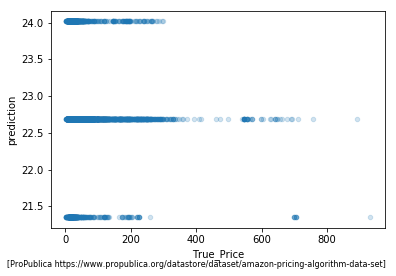

In [66]:
fig, ax = plt.subplots()
amazon.plot(kind = 'scatter', x = 'True_Price', y='prediction', ax=ax, alpha=0.2);

plt.annotate('[ProPublica https://www.propublica.org/datastore/dataset/amazon-pricing-algorithm-data-set]', 
             (-0.1,-0.1), (-10,-10), fontsize=8, xycoords='axes fraction', textcoords='offset points', va='top');

In [58]:
lr = LinearRegression()

X = amazon.loc[:, ['Vendor_True_Price']]
y = amazon.loc[:, 'True_Price']

lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
amazon.loc[:, 'prediction'] = lr.predict(X)

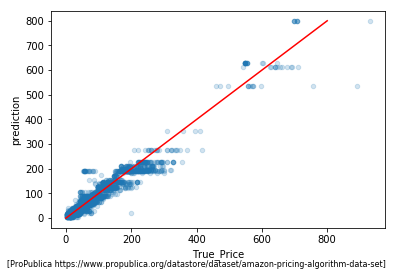

In [60]:
fig, ax = plt.subplots()
amazon.plot(kind = 'scatter', x = 'True_Price', y='prediction', ax=ax, alpha=0.2)
ax.plot([0, 800], [0, 800], 'r');

plt.annotate('[ProPublica https://www.propublica.org/datastore/dataset/amazon-pricing-algorithm-data-set]', 
             (-0.1,-0.1), (-10,-10), fontsize=8, xycoords='axes fraction', textcoords='offset points', va='top');

In [ ]:
sns.lmplot(x='fuel_eco_score', y='combi_mpg_1', data=fuel_economy,
          col='FT1', hue='FT1');